# Build a model using publicly available data for key *national* demand & supply factors that could influence US home prices. these factors impacted home prices over the last 20 years.

####  S&P Case-Schiller Home Price Index as a proxy for home prices:
 fred.stlouisfed.org/series/CSUSHPISA.

In [1]:
import pandas as pd

In [3]:
price= pd.read_csv('/content/CSUSHPISA.csv')

In [4]:
price

,observation_date,CSUSHPISA
0,1987-01-01,63.963
1,1987-02-01,64.422
2,1987-03-01,64.734
3,1987-04-01,65.130
4,1987-05-01,65.562
...,...,...
450,2024-07-01,321.523
451,2024-08-01,322.479
452,2024-09-01,323.454
453,2024-10-01,324.585


In [5]:
unemp_rate=pd.read_csv('/content/U2RATE.csv')

In [6]:
unemp_rate

,observation_date,U2RATE
0,1967-01-01,1.6
1,1967-02-01,1.6
2,1967-03-01,1.5
3,1967-04-01,1.6
4,1967-05-01,1.6
...,...,...
692,2024-09-01,1.9
693,2024-10-01,2.0
694,2024-11-01,2.0
695,2024-12-01,1.9


In [8]:
#New Houses for Sale by Stage of Construction, Not Started
constr_not_startd= pd.read_csv('/content/NHFSEPNTS.csv')  # thousands of units

In [9]:
constr_not_startd

,observation_date,NHFSEPNTS
0,1999-01-01,38
1,1999-02-01,38
2,1999-03-01,36
3,1999-04-01,41
4,1999-05-01,39
...,...,...
307,2024-08-01,94
308,2024-09-01,95
309,2024-10-01,97
310,2024-11-01,101


In [10]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('/content/NHFSEPUCS.csv')    # thousands of units

In [11]:
undr_constrtn

,observation_date,NHFSEPUCS
0,1999-01-01,178
1,1999-02-01,180
2,1999-03-01,185
3,1999-04-01,180
4,1999-05-01,184
...,...,...
307,2024-08-01,271
308,2024-09-01,271
309,2024-10-01,273
310,2024-11-01,270


In [12]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('/content/NHFSEPCS.csv') # thousands of units

In [13]:
cnstr_cmplt

,observation_date,NHFSEPCS
0,1999-01-01,68
1,1999-02-01,67
2,1999-03-01,68
3,1999-04-01,69
4,1999-05-01,72
...,...,...
307,2024-08-01,106
308,2024-09-01,107
309,2024-10-01,111
310,2024-11-01,117


In [16]:
df= pd.merge(cnstr_cmplt,undr_constrtn,on='observation_date',how='inner')

In [17]:
df1=pd.merge(constr_not_startd,unemp_rate,on='observation_date',how='inner')

In [19]:
df2=pd.merge(df,df1,on='observation_date',how='inner')

In [20]:
df2

,observation_date,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE
0,1999-01-01,68,178,38,2.0
1,1999-02-01,67,180,38,2.0
2,1999-03-01,68,185,36,1.9
3,1999-04-01,69,180,41,1.9
4,1999-05-01,72,184,39,1.9
...,...,...,...,...,...
307,2024-08-01,106,271,94,2.0
308,2024-09-01,107,271,95,1.9
309,2024-10-01,111,273,97,2.0
310,2024-11-01,117,270,101,2.0


In [21]:
data=pd.merge(df2,price,on='observation_date',how='inner')

In [22]:
data

,observation_date,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE,CSUSHPISA
0,1999-01-01,68,178,38,2.0,93.208
1,1999-02-01,67,180,38,2.0,93.672
2,1999-03-01,68,185,36,1.9,94.217
3,1999-04-01,69,180,41,1.9,94.784
4,1999-05-01,72,184,39,1.9,95.344
...,...,...,...,...,...,...
306,2024-07-01,103,268,93,2.1,321.523
307,2024-08-01,106,271,94,2.0,322.479
308,2024-09-01,107,271,95,1.9,323.454
309,2024-10-01,111,273,97,2.0,324.585


In [23]:
data.rename(columns = {'NHFSEPCS':'Cnstr_Cmplt', 'NHFSEPUCS':'Undr_Cnstr','NHFSEPNTS':'Cnstr_Not_Strtd','U2RATE':'Unemp_Rate','CSUSHPISA':'Prc_Indx'}, inplace = True)

In [24]:
data

,observation_date,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,1999-01-01,68,178,38,2.0,93.208
1,1999-02-01,67,180,38,2.0,93.672
2,1999-03-01,68,185,36,1.9,94.217
3,1999-04-01,69,180,41,1.9,94.784
4,1999-05-01,72,184,39,1.9,95.344
...,...,...,...,...,...,...
306,2024-07-01,103,268,93,2.1,321.523
307,2024-08-01,106,271,94,2.0,322.479
308,2024-09-01,107,271,95,1.9,323.454
309,2024-10-01,111,273,97,2.0,324.585


In [25]:
data.describe()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
count,311.000000,311.00000,311.000000,311.000000,311.000000
mean,82.356913,189.14791,54.919614,3.054984,179.402952
std,39.147586,69.12810,23.670111,1.567091,58.509473
min,31.000000,70.00000,22.000000,1.500000,93.208000
25%,57.000000,132.50000,37.000000,1.950000,141.581500
50%,76.000000,188.00000,50.000000,2.500000,168.044000
75%,89.500000,246.00000,75.000000,3.500000,201.809000
max,194.000000,338.00000,101.000000,13.200000,326.008000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  311 non-null    object 
 1   Cnstr_Cmplt       311 non-null    int64  
 2   Undr_Cnstr        311 non-null    int64  
 3   Cnstr_Not_Strtd   311 non-null    int64  
 4   Unemp_Rate        311 non-null    float64
 5   Prc_Indx          311 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 14.7+ KB


In [27]:
data.duplicated().sum()

0

In [28]:
data.isnull().sum()

,0
observation_date,0
Cnstr_Cmplt,0
Undr_Cnstr,0
Cnstr_Not_Strtd,0
Unemp_Rate,0
Prc_Indx,0


In [29]:
data.nunique()

,0
observation_date,311
Cnstr_Cmplt,112
Undr_Cnstr,162
Cnstr_Not_Strtd,74
Unemp_Rate,54
Prc_Indx,311


# EDA

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data['year'] = pd.DatetimeIndex(data['observation_date']).year

In [32]:
data

,observation_date,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
0,1999-01-01,68,178,38,2.0,93.208,1999
1,1999-02-01,67,180,38,2.0,93.672,1999
2,1999-03-01,68,185,36,1.9,94.217,1999
3,1999-04-01,69,180,41,1.9,94.784,1999
4,1999-05-01,72,184,39,1.9,95.344,1999
...,...,...,...,...,...,...,...
306,2024-07-01,103,268,93,2.1,321.523,2024
307,2024-08-01,106,271,94,2.0,322.479,2024
308,2024-09-01,107,271,95,1.9,323.454,2024
309,2024-10-01,111,273,97,2.0,324.585,2024


In [34]:
dd = data.groupby(by='year', as_index=False).agg({
    'Cnstr_Cmplt': 'mean',
    'Undr_Cnstr': 'mean',
    'Cnstr_Not_Strtd': 'mean',
    'Unemp_Rate': 'mean',
    'Prc_Indx': 'mean'
})  # Calculate the mean for specific numeric columns

In [35]:
dd

,year,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,1999,71.500000,183.000000,41.333333,1.875000,96.366000
1,2000,84.250000,180.250000,39.500000,1.766667,104.769000
2,2001,77.583333,182.333333,41.833333,2.416667,113.180250
3,2002,82.500000,199.000000,46.000000,3.183333,122.279333
4,2003,80.833333,213.916667,53.666667,3.316667,133.731917
5,2004,89.916667,243.250000,62.166667,2.850000,150.441250
6,2005,106.750000,279.500000,81.416667,2.433333,171.738333
7,2006,144.083333,318.166667,91.083333,2.191667,183.447250
8,2007,185.416667,267.166667,78.500000,2.291667,179.918667
9,2008,179.083333,190.416667,56.000000,3.116667,164.056667


#### From 2001 to 2019  the mean number of houses where construction was completed were greater than the mean number of houses where construction was not started, but from 2020 the scenario became opposite

####  Mean number of Houses at under construction stage were always greater than the mean number of houses where construction is completed or not started  except in the year 2009 when the unemployment rate was incresing throughout the year

####  Unemployment rate was high for three consecutive years from 2009 to 2011 which impacted the price of houses available for sale (price became Low) and also the availablity of new houses for sale also went down.

#### In the year 2020 there was a sudden increase in the Unemployment Rate but there was no effect on the house prices, but the  number of houses whose construction were completed went down because of the Unemployment rate.


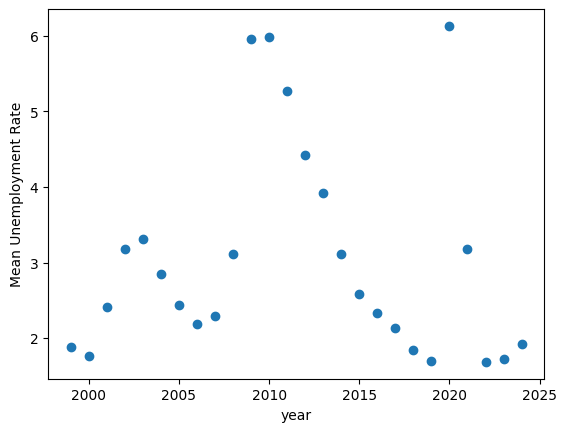

In [36]:
plt.scatter(dd.year,dd.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

#### the first peak in unemployment rate came in the year 2009 and started to decrease slowly from 2011and became lewest in the year 2019 and again the second peak was seen in 2020.

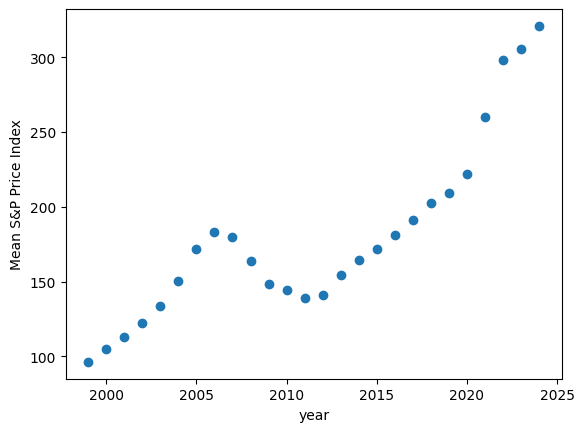

In [37]:
plt.scatter(dd.year,dd.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

#### The price of house kept on increasing from year 2001 to 2006 and started gradually decreasing from 2007 to 2012 ( in the same year the unemployment rate started increasing ), after 2020 there was large difference in the price of house.    

In [38]:
dMax=data.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
dMax

,year,observation_date,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,1999,1999-12-01,77,191,47,2.0,99.844
1,2000,2000-12-01,90,188,42,1.9,109.141
2,2001,2001-12-01,82,191,45,3.1,116.454
3,2002,2002-12-01,86,204,52,3.3,127.624
4,2003,2003-12-01,86,232,61,3.5,140.181
5,2004,2004-12-01,97,257,70,3.1,159.332
6,2005,2005-12-01,110,306,95,2.7,180.911
7,2006,2006-12-01,166,338,100,2.3,184.364
8,2007,2007-12-01,194,285,85,2.5,184.599
9,2008,2008-12-01,191,227,69,4.3,173.131


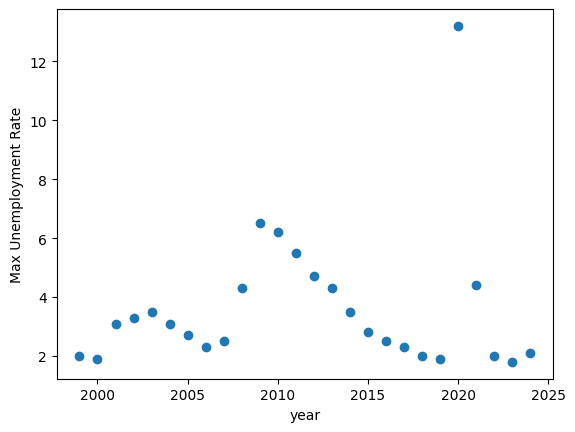

In [39]:
plt.scatter(dMax.year,dMax.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

#### Maximum Unemploylent Rate was seen in the year 2020

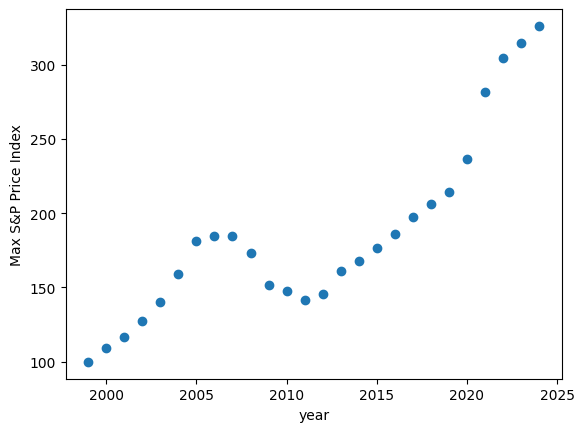

In [40]:
plt.scatter(dMax.year,dMax.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [41]:
dMin=data.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
dMin

,year,observation_date,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,1999,1999-01-01,67,175,36,1.7,93.208
1,2000,2000-01-01,79,170,37,1.6,100.551
2,2001,2001-01-01,75,170,39,1.9,109.847
3,2002,2002-01-01,77,190,40,3.1,117.143
4,2003,2003-01-01,77,202,51,3.1,128.461
5,2004,2004-01-01,82,231,54,2.7,141.647
6,2005,2005-01-01,102,264,70,2.3,161.289
7,2006,2006-01-01,113,290,80,2.1,182.321
8,2007,2007-01-01,169,234,72,2.1,174.340
9,2008,2008-01-01,166,145,42,2.5,153.618


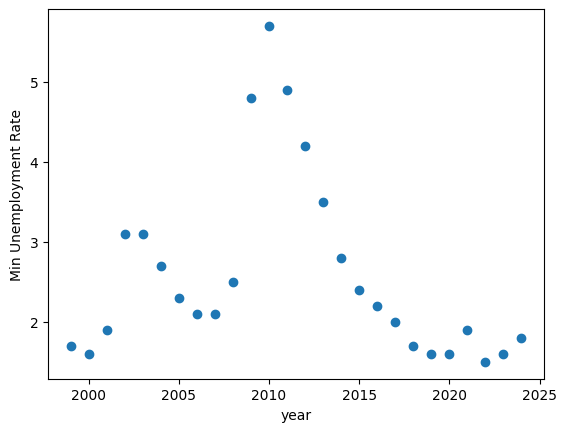

In [42]:
plt.scatter(dMin.year,dMin.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

#### Minimum Unemployment Rate was seen in the year 2019

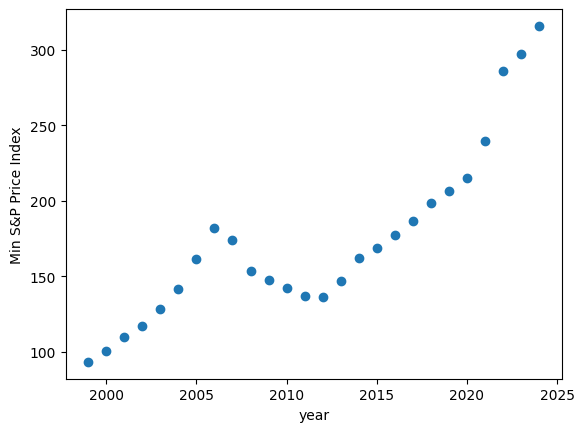

In [43]:
plt.scatter(dMin.year,dMin.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

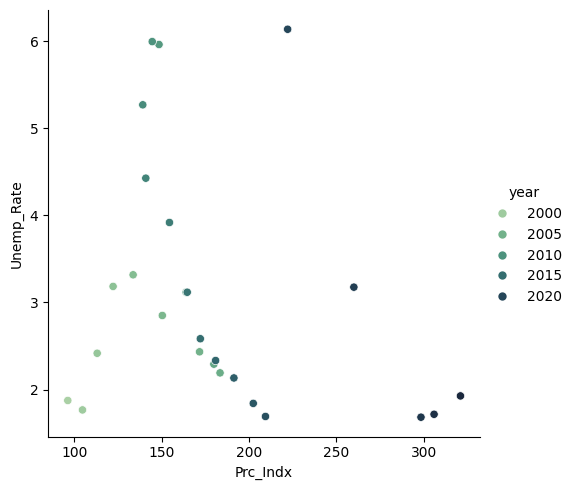

In [44]:
sns.relplot(x="Prc_Indx", y="Unemp_Rate", hue="year", palette="ch:r=-.5,l=.75", data=dd);


In [45]:
data[data['year']==2011]   # All the features value in the year 2011

,observation_date,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
144,2011-01-01,75,84,28,5.5,141.516,2011
145,2011-02-01,74,82,27,5.5,140.344,2011
146,2011-03-01,72,82,25,5.4,139.975,2011
147,2011-04-01,69,79,25,5.4,140.007,2011
148,2011-05-01,67,77,24,5.4,139.903,2011
149,2011-06-01,65,78,23,5.3,139.859,2011
150,2011-07-01,66,77,23,5.3,139.727,2011
151,2011-08-01,64,75,23,5.2,139.306,2011
152,2011-09-01,62,74,24,5.2,138.664,2011
153,2011-10-01,59,75,24,5.1,137.947,2011


In [47]:
new=pd.read_csv('/content/HNFSEPUSSA.csv')  # Total number of houses for sale

In [48]:
new.head(12)

,observation_date,HNFSEPUSSA
0,1963-01-01,235
1,1963-02-01,238
2,1963-03-01,242
3,1963-04-01,246
4,1963-05-01,248
5,1963-06-01,253
6,1963-07-01,254
7,1963-08-01,264
8,1963-09-01,257
9,1963-10-01,274


In [49]:
new.describe()

,HNFSEPUSSA
count,744.000000
mean,317.294355
std,87.361662
min,142.000000
25%,256.750000
50%,315.000000
75%,365.000000
max,572.000000


In [50]:
new['year']=  pd.DatetimeIndex(new['observation_date']).year

In [52]:
# Convert 'observation_date' to datetime before grouping
new['observation_date'] = pd.to_datetime(new['observation_date'])
dd1 = new.groupby(by='year', as_index=False).mean(numeric_only=True)

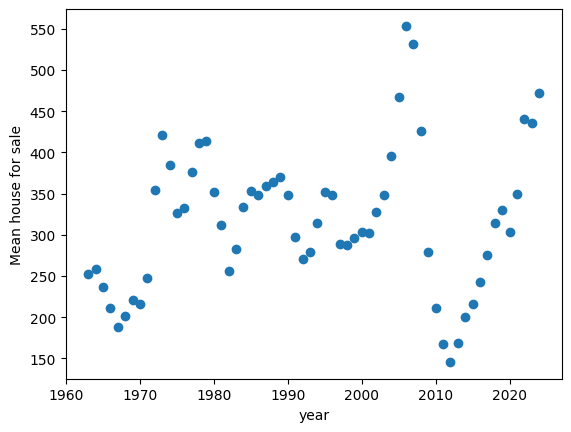

In [53]:
plt.scatter(dd1.year,dd1.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

#### Maximum number of houses were available in 2006 and least in 2012


In [54]:
dd1mx=new.groupby(by='year',as_index=False).max()
dd1mx

,year,observation_date,HNFSEPUSSA
0,1963,1963-12-01,274
1,1964,1964-12-01,266
2,1965,1965-12-01,251
3,1966,1966-12-01,228
4,1967,1967-12-01,194
...,...,...,...
57,2020,2020-12-01,333
58,2021,2021-12-01,389
59,2022,2022-12-01,466
60,2023,2023-12-01,450


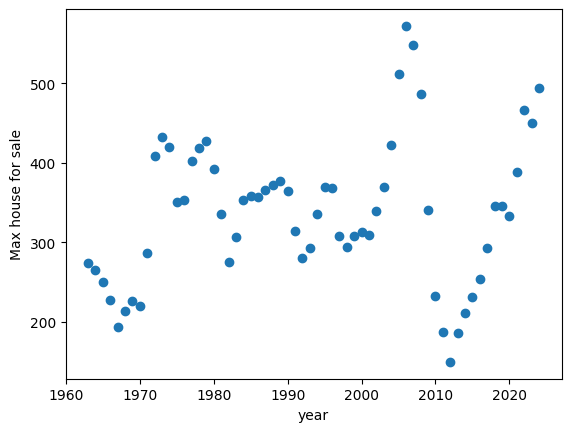

In [55]:
plt.scatter(dd1mx.year,dd1mx.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [56]:
dd1mn=new.groupby(by='year',as_index=False).min()
dd1mn

,year,observation_date,HNFSEPUSSA
0,1963,1963-01-01,235
1,1964,1964-01-01,249
2,1965,1965-01-01,226
3,1966,1966-01-01,193
4,1967,1967-01-01,181
...,...,...,...
57,2020,2020-01-01,282
58,2021,2021-01-01,303
59,2022,2022-01-01,394
60,2023,2023-01-01,426


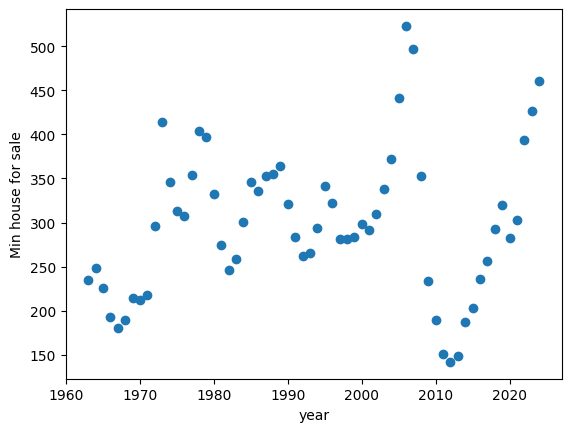

In [57]:
plt.scatter(dd1mn.year,dd1mn.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [60]:
import numpy as np
data['observation_date'] = pd.to_datetime(data['observation_date'])  # Convert to datetime objects
# Extract numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical columns
print(correlation_matrix)

                 Cnstr_Cmplt  Undr_Cnstr  Cnstr_Not_Strtd  Unemp_Rate  \
Cnstr_Cmplt         1.000000    0.365561         0.256246   -0.041845   
Undr_Cnstr          0.365561    1.000000         0.924930   -0.547813   
Cnstr_Not_Strtd     0.256246    0.924930         1.000000   -0.429330   
Unemp_Rate         -0.041845   -0.547813        -0.429330    1.000000   
Prc_Indx           -0.124673    0.520936         0.746089   -0.240552   
year               -0.382278    0.061643         0.342038   -0.025575   

                 Prc_Indx      year  
Cnstr_Cmplt     -0.124673 -0.382278  
Undr_Cnstr       0.520936  0.061643  
Cnstr_Not_Strtd  0.746089  0.342038  
Unemp_Rate      -0.240552 -0.025575  
Prc_Indx         1.000000  0.861292  
year             0.861292  1.000000  


In [62]:
df=pd.merge(new,data,on='observation_date',how ='inner')

In [63]:
df=df.drop(columns=['year_x','year_y','Cnstr_Cmplt','Undr_Cnstr','Cnstr_Not_Strtd'],axis=1)


In [64]:
df.rename(columns={'HNFSEPUSSA':'ttl_homes_avlbl_for_sale'},inplace=True)

In [65]:
df.drop(columns=['observation_date'],axis=1,inplace=True)

In [66]:
df

,ttl_homes_avlbl_for_sale,Unemp_Rate,Prc_Indx
0,284,2.0,93.208
1,285,2.0,93.672
2,289,1.9,94.217
3,290,1.9,94.784
4,295,1.9,95.344
...,...,...,...
306,464,2.1,321.523
307,471,2.0,322.479
308,473,1.9,323.454
309,481,2.0,324.585


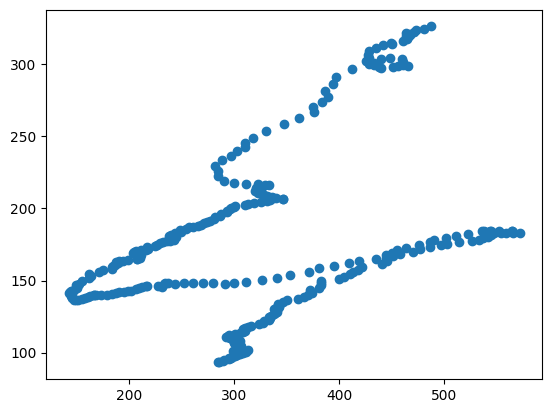

In [67]:
plt.scatter(df.ttl_homes_avlbl_for_sale,df.Prc_Indx)

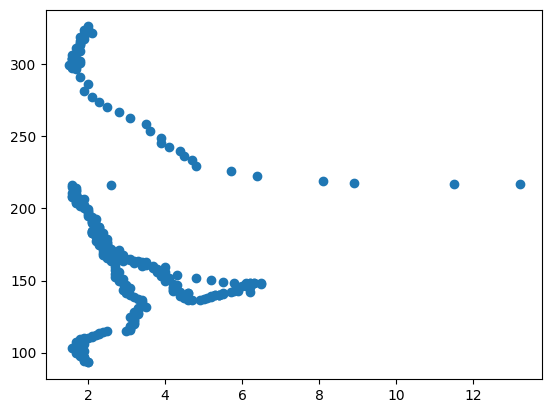

In [68]:
plt.scatter(df.Unemp_Rate,df.Prc_Indx)

# Model Building

In [69]:
X=df.drop(columns=['Prc_Indx'],axis=1)
Y=df['Prc_Indx']

In [70]:
from sklearn.model_selection import train_test_split
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [72]:
lr=LinearRegression()

In [73]:
lr.fit(Xtr,Ytr)

LinearRegression()

In [74]:
yprd=lr.predict(Xts)

In [75]:
score=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(Xtr,Ytr)
    yprd=lr.predict(Xts)
    score.append(r2_score(Yts,yprd))

In [76]:
import numpy as np
np.argmax(score)

346

In [77]:
score[np.argmax(score)]

0.30511470673273133

#### Since the realtion between dependent and independent  variable is not linear  LR model is not giving good result

#### Therefor we are using Random forest regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(Xtr, Ytr)

RandomForestRegressor(max_depth=9, random_state=0)

In [79]:
Y_pred = regressor1.predict(Xts)

r2_score(Yts,Y_pred)

0.522012182488889

In [80]:
scoree=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(Xtr, Ytr)
    yprd=regressor.predict(Xts)
    scoree.append(r2_score(Yts,yprd))

In [81]:
np.argmax(scoree)


487

In [82]:
scoree[np.argmax(scoree)]

0.9586385480141846